In [1]:
# Demo script to load and plot cGAN forecast data.
import os
from datetime import datetime

# These are the functions that you can use:
from show_forecasts.show_cGAN import (
    load_GAN_forecast,
    plot_GAN_forecast,
    plot_GAN_ensemble,
)
from show_forecasts.show_cGAN import (
    plot_GAN_threshold_chance,
    plot_GAN_local_histograms,
)
from show_forecasts.data_utils import load_env_file

load_env_file()

mask_region = os.getenv("MASK_REGION", None)
use_ui_fs = os.getenv("USE_UI_FS", "")
cgan_ui_fs = True if use_ui_fs.lower() in ["t", "true", "y", "yes", "1"] else False
data_dir = os.environ["GAN_DATA_DIR"]

print("Mask Region: ", mask_region)
print("Data Dir: ", data_dir)

INFO: Loading environment variables from /home/jason/Sources/show-forecasts/.env
INFO: loaded settings from environment variables!
Mask Region:  None
Data Dir:  /home/jason/Sources/cgan-ui/store/GAN_forecast


In [2]:
# The date that the forecast was initialised
forecast_init_date = datetime(year=2024, month=6, day=20)
# Pick today instead:
# forecast_init_date = datetime.now()
loader_args = {"forecast_init_date": forecast_init_date, "data_dir": data_dir}

if mask_region is not None:
    loader_args.update({"mask_region": mask_region, "cgan_ui_fs": cgan_ui_fs})

In [3]:
# Load the GAN forecast
data = load_GAN_forecast(**loader_args)

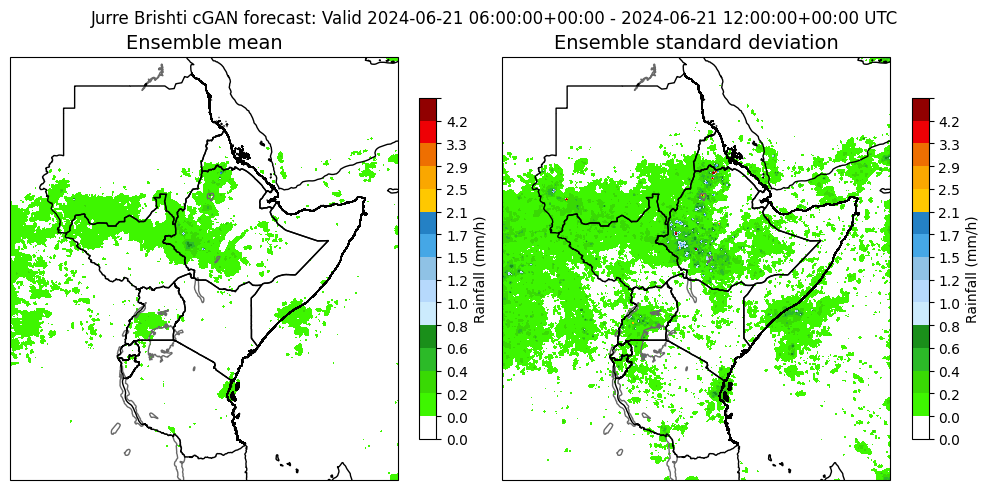

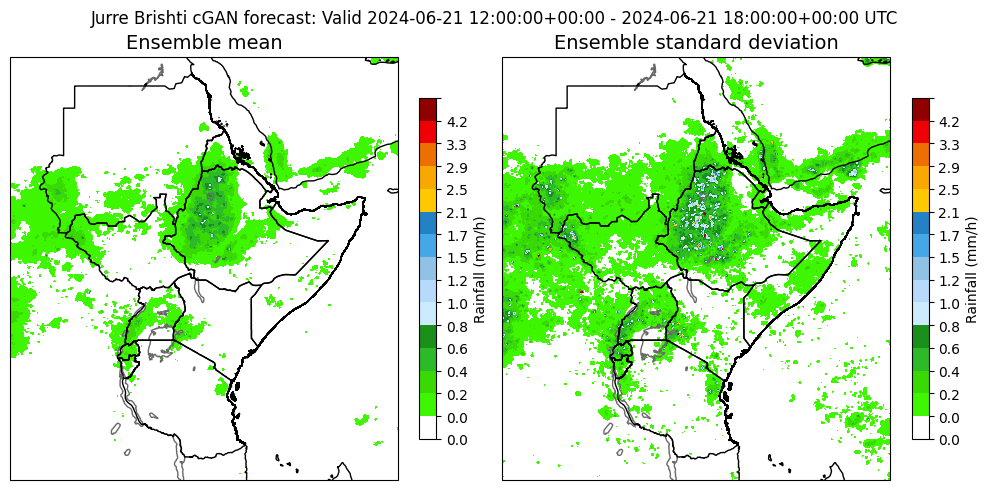

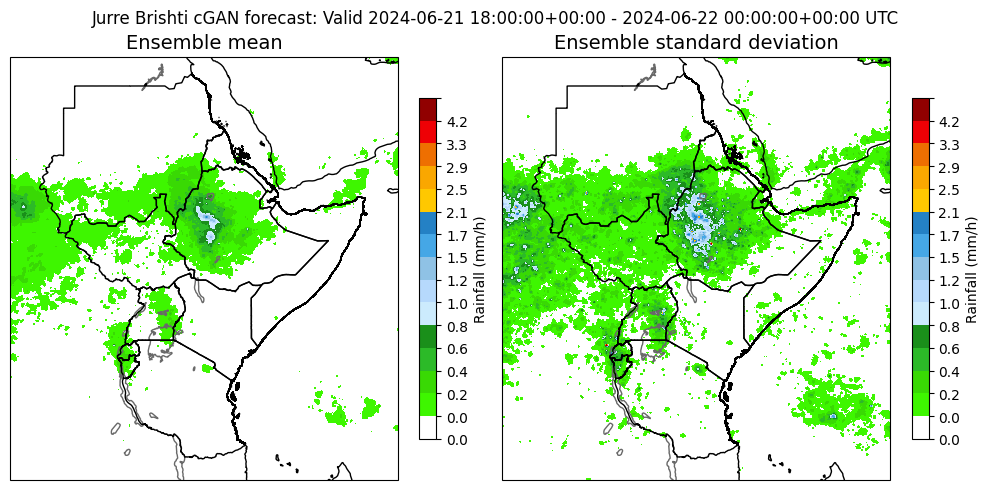

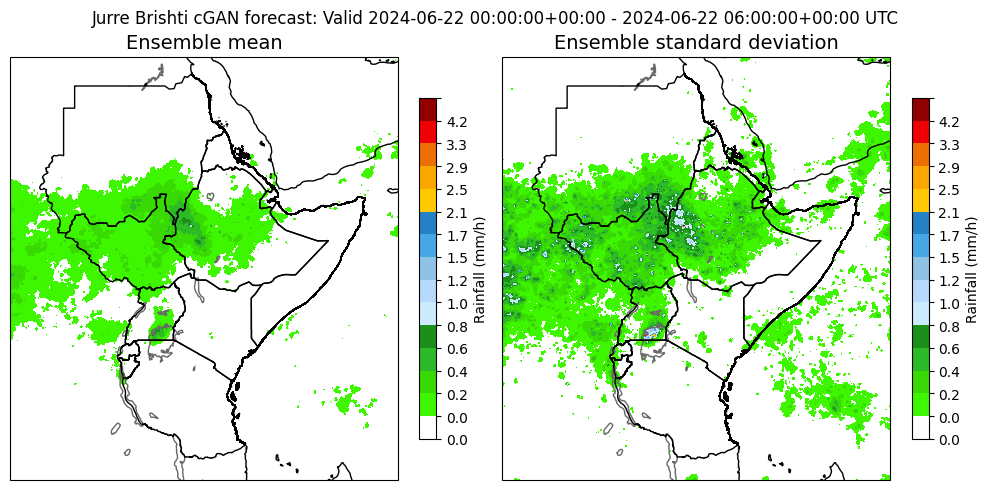

In [4]:
# Plot the GAN forecast
plot_GAN_forecast(data, style="KMD", region=mask_region)

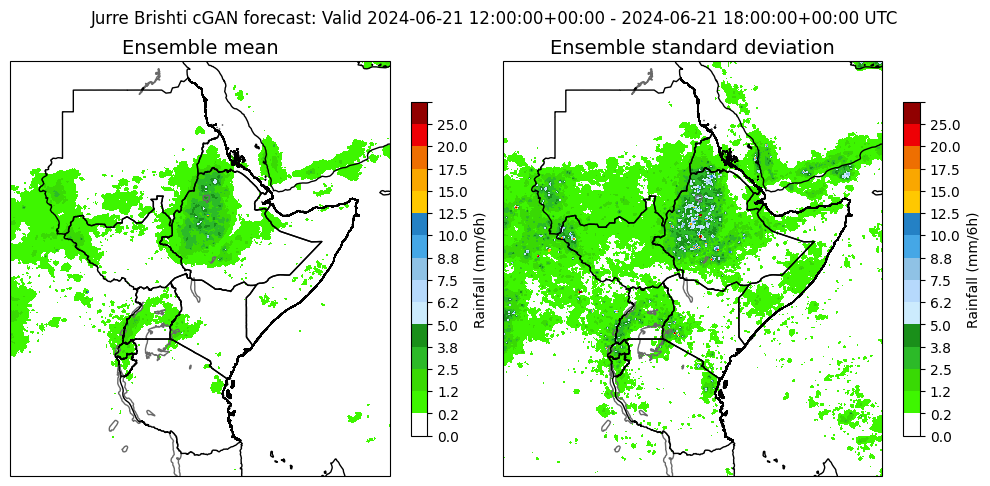

In [5]:
# Plot just one time: Options are 6, 12, 18, 0 or 'all'.
# style options: None (default), 'ICPAC', 'ICPAC_heavy', 'KMD', 'EMI', 'EMI_heavy'
# plot_units can be 'mm/h' (default), 'mm/6h', 'mm/day' or 'mm/week'
# region can be 'ICPAC', 'Kenya', 'South Sudan', 'Rwanda', 'Burundi', 'Djibouti',
#               'Eritrea', 'Ethiopia', 'Sudan', 'Somalia', 'Tanzania', 'Uganda'
# A file name can be specified using file_name="my_file.pdf". File types can be
#               png, jpg or pdf.
plot_GAN_forecast(
    data,
    valid_time_start_hour="12",
    style="KMD",
    plot_units="mm/6h",
    region=mask_region,
)

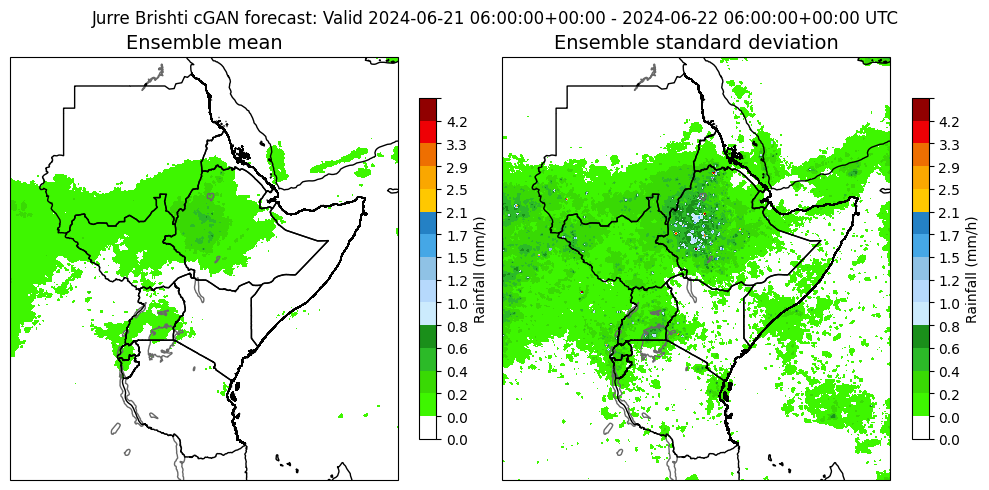

In [6]:
# Plot the rainfall over 24 hours
plot_GAN_forecast(
    data, accumulation_time="24h", style="KMD", plot_units="mm/h", region=mask_region
)

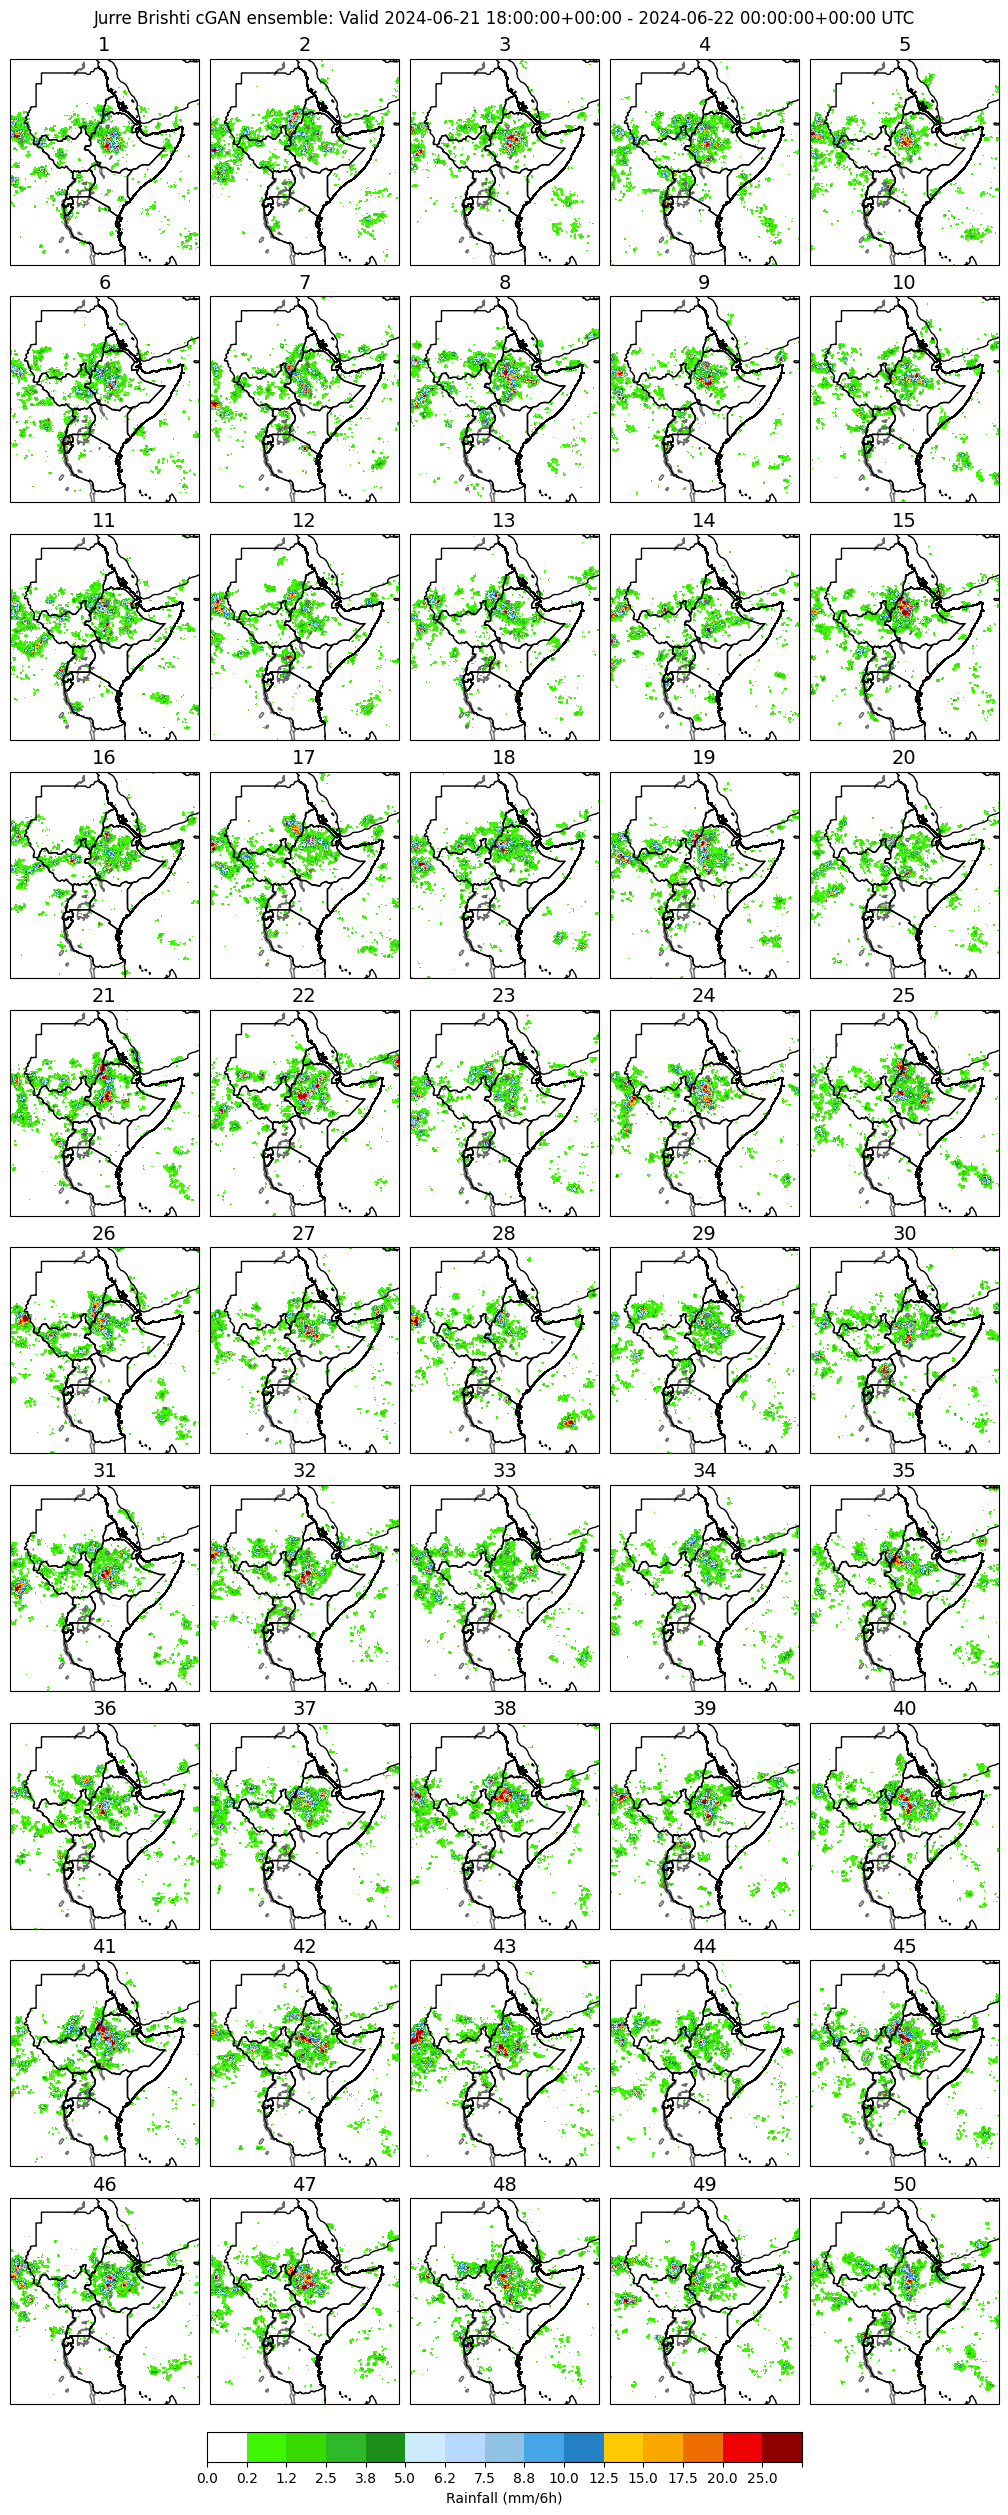

In [7]:
# Plot the full ensemble
#   valid_time_start_hour=6 - The hour the valid time starts at. Can either be 6, 12, 18 or 0 UTC.
plot_GAN_ensemble(
    data,
    valid_time_start_hour="18",
    style="KMD",
    plot_units="mm/6h",
    region=mask_region,
)

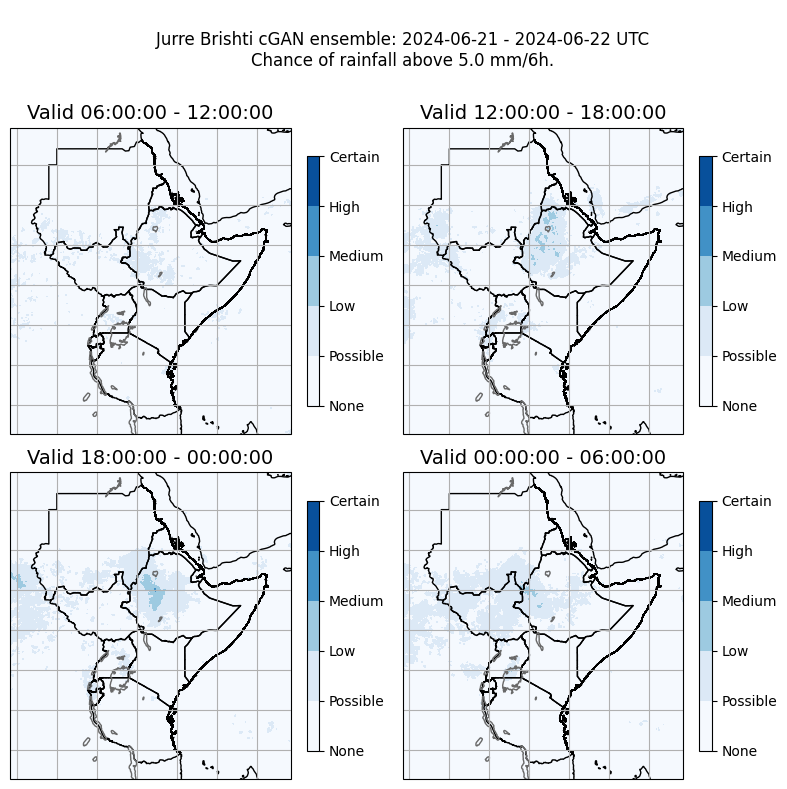

In [8]:
# Plot the chance of rainfall at a rate above a specified threshold.
#   threshold=2             - We'll plot the chance of rainfall above this threshold rate. The
#                             default is 2 mm/h. The units of threshold is set by plot_units.
#   plot_units='mm/h'       - Can be 'mm/h' (default), 'mm/6h', 'mm/day' or 'mm/week'
#   valid_time_start_hour=6 - The hour the valid time starts at. Can either be 6, 12, 18 or 0 UTC or 'all'.
plot_GAN_threshold_chance(
    data,
    threshold=5,
    plot_units="mm/6h",
    valid_time_start_hour="all",
    show_percentages=False,
    region=mask_region,
)

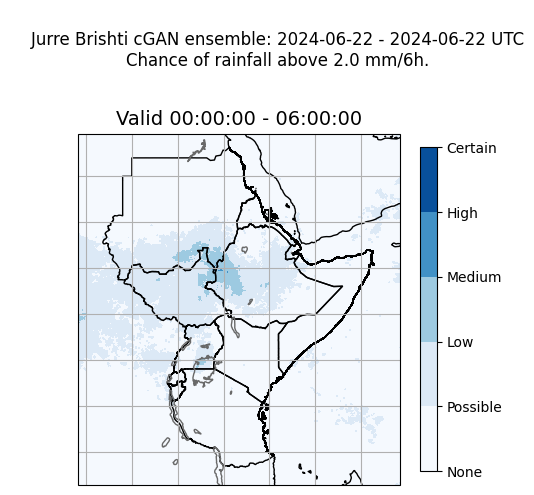

In [9]:
plot_GAN_threshold_chance(
    data,
    threshold=2,
    plot_units="mm/6h",
    valid_time_start_hour="0",
    show_percentages=False,
    region=mask_region,
)

In [10]:
from show_forecasts.data_utils import print_locations

# Prints the named locations available for making histograms
# All locations are listed in the file show_forecasts/shapes/locations.py
#   Optionally restrict the country to one of 'Kenya', 'South Sudan', 'Rwanda',
#   'Burundi', 'Djibouti', 'Eritrea', 'Ethiopia', 'Sudan', 'Somalia',
#   'Tanzania', 'Uganda'
print_locations(country=mask_region)

Akimpama, Burundi, (-3.3845N, 30.465E)
Bahanza, Burundi, (-3.01859N, 30.13689E)
Bahizi, Burundi, (-2.5335N, 30.2277E)
Bakashi, Burundi, (-3.6157N, 29.8296E)
Bake, Burundi, (-3.5318N, 30.1729E)
Bamba, Burundi, (-3.9359N, 29.7648E)
Bambo, Burundi, (-2.9047N, 29.26E)
Bambu, Burundi, (-2.8673N, 29.2207E)
Banda, Burundi, (-2.6497N, 30.3192E)
Bandaga, Burundi, (-3.0677N, 29.5941E)
Bandage, Burundi, (-4.115N, 29.5927E)
Bandaguro, Burundi, (-3.5748N, 29.8987E)
Banga, Burundi, (-3.1334N, 29.6444E)
Bangwe, Burundi, (-4.3227N, 29.5957E)
Banza, Burundi, (-3.8152N, 29.6999E)
Barega, Burundi, (-3.9754N, 29.9422E)
Bareremba, Burundi, (-4.0498N, 30.108E)
Bariro, Burundi, (-3.7079N, 30.2539E)
Bariza, Burundi, (-3.5767N, 29.6177E)
Bartye, Burundi, (-3.9623N, 29.8245E)
Basaro, Burundi, (-2.5718N, 30.3575E)
Batamba, Burundi, (-3.7828N, 30.1936E)
Batsimba, Burundi, (-3.684N, 30.214E)
Bavumu, Burundi, (-2.7937N, 30.2294E)
Bayaga, Burundi, (-3.7442N, 30.2181E)
Bayumbu, Burundi, (-3.7033N, 30.1947E)
Baziro, B

In [11]:
# The location name can be selected from the list returned by print_locations()
# All locations are listed in the file show_forecasts/shapes/locations.py
#   For the case of the same name in different countries, the country can optionally
#   be selected from 'Kenya', 'South Sudan', 'Rwanda', 'Burundi', 'Djibouti',
#   'Eritrea', 'Ethiopia', 'Sudan', 'Somalia', 'Tanzania', 'Uganda'.
# Be carefull. Sometimes there are a few places with the same name.
plot_GAN_local_histograms(data, "Kirkos", country=mask_region, plot_units="mm/6h")

ERROR: Location 'Kirkos' is not in the list of locations.


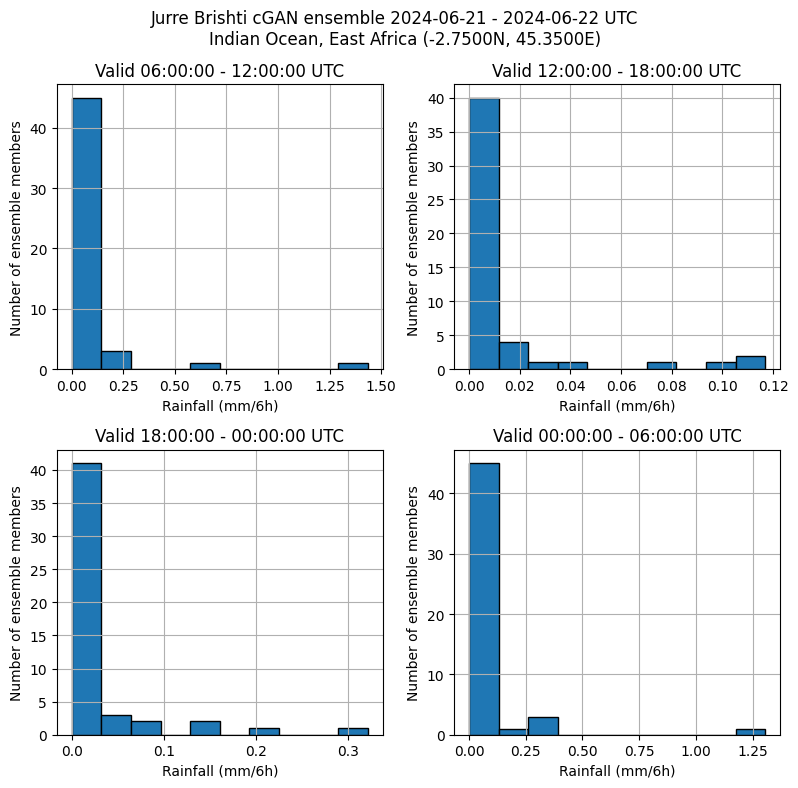

In [12]:
# Or if you want to specify the latitude and longitude, you can call the location what you like
plot_GAN_local_histograms(
    data, "Indian Ocean", latitude=-2.75, longitude=45.35, plot_units="mm/6h"
)

In [13]:
# !jupyter nbconvert --to html test_GAN_forecast.ipynb